EJERCICIO 1: IMPLEMENTACIÓN TRANSFORMADA DISCRETA DE FOURIER

Text(0.5, 0, 'Frequency')

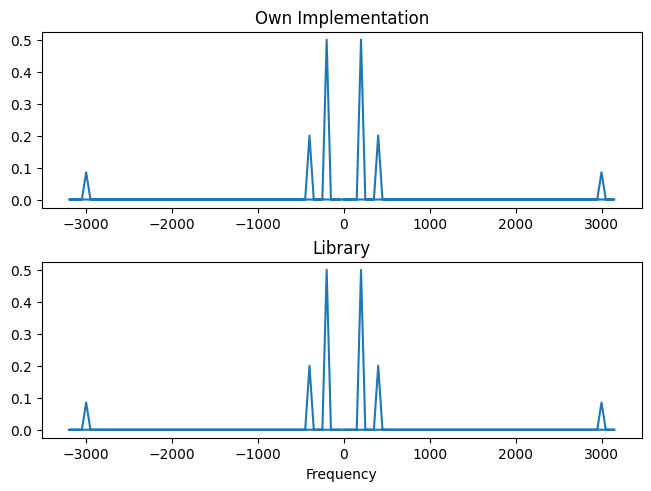

In [4]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq

# Construcción de la señal
N = 128 # number of point in the whole interval
f = 200.0 #  frequency in Hz
dt = 1 / (f * 32 ) #32 samples per unit frequency
t = np.linspace( 0, (N-1)*dt, N)
y = np.cos(2 * np.pi * f * t) - 0.4 * np.sin(2 * np.pi * (2*f) * t )+ 0.17*np.sin(2 * np.pi * (15*f) * t )

# 1) implemente de la transformada de fourier discreta

Y = np.empty(N, dtype=complex)

for k in range(N):
    sum = 0.0
    for n in range(N):
        sum  += y[n]*np.exp(-2*1j*np.pi*k*n/N)
    Y[k] = sum

Y = Y/N

# 2) Genere el arreglo de las frecuencias (ver documentación de fftfreq):

freq = fftfreq(N, dt)

# 3) Haga una gráfica comparando método propio con implementación de scipy.fftpack.fft

fft_x = fft(y) / N # FFT Normalized

fig, axs = plt.subplots(2, layout='constrained')
axs[0].set_title("Own Implementation")
axs[0].plot(freq, np.abs(Y))

axs[1].set_title("Library")
axs[1].plot(freq, np.abs(fft_x))
axs[1].set_xlabel(f"Frequency")


EJERCICIO 2: FILTRO DE FOURIER

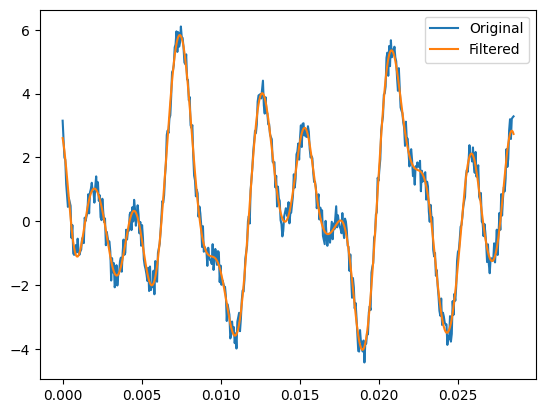

In [5]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, ifft, fftfreq

# 1) Almacene los datos de signal.dat. La columna 1 es el tiempo y la columna 2 es su señal f(t).
#Grafique su señal en función del tiempo.

time, f_t = np.genfromtxt("signal.dat", delimiter=",", unpack=True)

plt.plot(time, f_t, label=f"Original")


# 2) Use fftfreq (BONO si usa su implementación propia) y haga una gráfica de su transformada de fourier en función de las frecuencias.

N = f_t.size
dt = (time[-1] - time[0])/time.size
W = fftfreq(N, dt)
fft_w = fft(f_t) / N

#plt.plot(W, np.abs(fft_w))
#plt.axvline(x=800, color='r', linestyle='--') # Mirando donde cortar


# 3) Haga un filtro pasa bajos que le permita filtrar el ruido de la señal del punto 1. #
#Use la gráfica de la transformada de fourier del punto 3 para determinar un valor apropiado de la frecuencia de corte que debe usar para filtrar dicho ruido de alta frecuencia.

for i in range(N):
    if np.abs(W[i]) > 800:
        fft_w[i] = 0.0

#plt.plot(W, np.abs(fft_w))


# 4) Grafique la señal filtrada

y_t = ifft(fft_w) * N
plt.plot(time, y_t, label=f"Filtered")
plt.legend()

EJERCICIO 3 (hagánlo cuando terminen los de transformada de Fourier 2D): FILTROS VIOLIN-TROMPETA

/tmp/ipykernel_13741/1965397601.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  data_vio_peak = np.asarray(data_vio_peak, dtype=np.int16)
/tmp/ipykernel_13741/1965397601.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
  data_vio_low = np.asarray(data_vio_low, dtype=np.int16)
/tmp/ipykernel_13741/1965397601.py:73: ComplexWarning: Casting complex values to real discards the imaginary part
  data_vio_high = np.asarray(data_vio_high, dtype=np.int16)
/tmp/ipykernel_13741/1965397601.py:115: ComplexWarning: Casting complex values to real discards the imaginary part
  data_trump_peak = np.asarray(data_trump_peak, dtype=np.int16)
/tmp/ipykernel_13741/1965397601.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  data_trump_low = np.asarray(data_trump_low, dtype=np.int16)
/tmp/ipykernel_13741/1965397601.py:150: ComplexWarning: Casting complex values to real discards the imaginary part
  data_tr

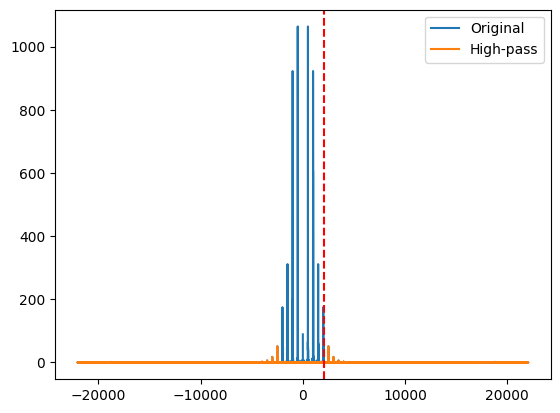

In [6]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, ifft, fftfreq
from scipy.io import wavfile

# 1) Almacene los datos de violin.wav (use wav.read('violin.wav')).
#Grafique su señal en función del tiempo y guarde dicha gráfica.

sample_rate_vio, data_vio = wavfile.read("violin.wav")

N_vio = data_vio.size
duration_vio = N_vio / sample_rate_vio
time = np.linspace(0.0, duration_vio, N_vio)

#plt.plot(time, data_vio)
#plt.savefig(f"violin_sound.pdf")

# 2) Use fftfreq (BONO si usa su implementación propia) y haga una gráfica de su transformada de fourier en función de las frecuencias.

freq_vio = fftfreq(N_vio, 1/sample_rate_vio)
fft_vio = fft(data_vio) / N_vio

#plt.plot(freq_vio, np.abs(fft_vio), label="Original")


# 3) Haga un filtro que elimine el pico principal. Grafique su señal filtrada.
#Escuche (OJO con el volumen!) sus datos filtrados.

fft_vio_peak = np.copy(fft_vio)
for i in range(N_vio):
    if np.abs(fft_vio[i]) > 300:
        fft_vio_peak[i] = 0.0

#plt.plot(freq_vio, np.abs(fft_vio_peak), label="No Peak")
#plt.legend()

data_vio_peak = ifft(fft_vio_peak) * N_vio
data_vio_peak = np.asarray(data_vio_peak, dtype=np.int16)

wavfile.write("vio_nopeak.wav", sample_rate_vio, data_vio_peak)


#Repita lo anterior haciendo un filtro pasaaltos y uno pasabajos.

treshold = 3.1e3

fft_vio_low = np.copy(fft_vio)
for i in range(N_vio):
    if np.abs(freq_vio[i]) > treshold:
        fft_vio_low[i] = 0.0

#plt.plot(freq_vio, np.abs(fft_vio_low), label="Low-pass")
#plt.axvline(x=treshold, color='r', linestyle='--')
#plt.legend()

data_vio_low = ifft(fft_vio_low) * N_vio
data_vio_low = np.asarray(data_vio_low, dtype=np.int16)

wavfile.write("vio_lowpass.wav", sample_rate_vio, data_vio_low)



fft_vio_high = np.copy(fft_vio)
for i in range(N_vio):
    if np.abs(freq_vio[i]) < treshold:
        fft_vio_high[i] = 0.0

#plt.plot(freq_vio, np.abs(fft_vio_high), label="High-pass")
#plt.axvline(x=treshold, color='r', linestyle='--')
#plt.legend()

data_vio_high = ifft(fft_vio_high) * N_vio
data_vio_high = np.asarray(data_vio_high, dtype=np.int16)

wavfile.write("vio_highpass.wav", sample_rate_vio, data_vio_high)

#NOTA: para el manejo de archivos .wav mire la documentacion de python de input-output en https://docs.scipy.org/doc/scipy-0.14.0/reference/io.html)



# 4) repita lo anterior para trumpet.wav que es la señal correspondiente al sonido de una trompeta tocando la misma nota que el violín del puntos anterior.

# 4-1) Almacene los datos de trumpet.wav (use wav.read('trumpet.wav')).
#Grafique su señal en función del tiempo y guarde dicha gráfica.

sample_rate_trump, data_trump = wavfile.read("trumpet.wav")

N_trump = data_trump.size
duration_trump = N_trump / sample_rate_trump
time = np.linspace(0.0, duration_trump, N_trump)

#plt.plot(time, data_trump)
#plt.savefig(f"trumplin_sound.pdf")

# 4-2) Use fftfreq (BONO si usa su implementación propia) y haga una gráfica de su transformada de fourier en función de las frecuencias.

freq_trump = fftfreq(N_trump, 1/sample_rate_trump)
fft_trump = fft(data_trump) / N_trump

plt.plot(freq_trump, np.abs(fft_trump), label="Original")


# 4-3) Haga un filtro que elimine el pico principal. Grafique su señal filtrada.
#Escuche (OJO con el volumen!) sus datos filtrados.

fft_trump_peak = np.copy(fft_trump)
for i in range(N_trump):
    if np.abs(fft_trump[i]) > 950:
        fft_trump_peak[i] = 0.0

#plt.plot(freq_trump, np.abs(fft_trump_peak), label="No Peak")
#plt.legend()

data_trump_peak = ifft(fft_trump_peak) * N_trump
data_trump_peak = np.asarray(data_trump_peak, dtype=np.int16)

wavfile.write("trump_nopeak.wav", sample_rate_trump, data_trump_peak)


#Repita lo anterior haciendo un filtro pasaaltos y uno pasabajos.

treshold = 2.1e3

fft_trump_low = np.copy(fft_trump)
for i in range(N_trump):
    if np.abs(freq_trump[i]) > treshold:
        fft_trump_low[i] = 0.0

#plt.plot(freq_trump, np.abs(fft_trump_low), label="Low-pass")
#plt.axvline(x=treshold, color='r', linestyle='--')
#plt.legend()

data_trump_low = ifft(fft_trump_low) * N_trump
data_trump_low = np.asarray(data_trump_low, dtype=np.int16)

wavfile.write("trump_lowpass.wav", sample_rate_trump, data_trump_low)



fft_trump_high = np.copy(fft_trump)
for i in range(N_trump):
    if np.abs(freq_trump[i]) < treshold:
        fft_trump_high[i] = 0.0

plt.plot(freq_trump, np.abs(fft_trump_high), label="High-pass")
plt.axvline(x=treshold, color='r', linestyle='--')
plt.legend()

data_trump_high = ifft(fft_trump_high) * N_trump
data_trump_high = np.asarray(data_trump_high, dtype=np.int16)

wavfile.write("trump_highpass.wav", sample_rate_trump, data_trump_high)


EJERCICIO 4: FILTRO RUIDO PERIÓDICO IMAGEN 2D

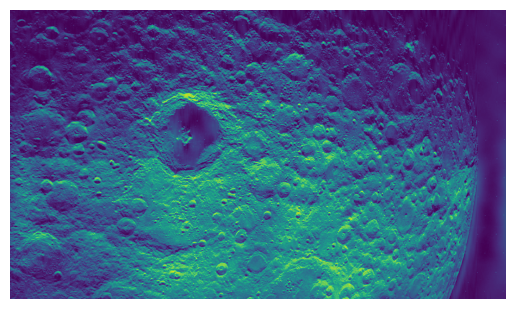

In [13]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fft2, ifft2, fftfreq, fftshift, ifftshift

# 1) Almacene los datos de la imagen (use imread: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)

image = plt.imread("moon.jpg")
#plt.imshow(image)


# 2) Use la librería de scipy de transformada de fourier en 2d y la trasnformada inversa
#(https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft2.html)
#para hacer un código que filtre el ruido periodico que tiene la imagen de la luna.

fft_kxky = fft2(image)
fft_kxky_shift = fftshift(fft_kxky)
magnitude_spectrum = np.log(1 + np.abs(fft_kxky_shift))

Ni = magnitude_spectrum.shape[0]
Nj = magnitude_spectrum.shape[1]
ky_cut = 10.0
kx_cut = 12.0
for i in range(Ni):
    for j in range(Nj):
        if np.abs(i - Ni/2) < ky_cut and np.abs(j - Nj/2) > kx_cut:
            fft_kxky_shift[i, j] = 0.0



"""magnitude_spectrum = np.log(1 + np.abs(fft_kxky_shift)) # Mirando done cortar
plt.imshow(magnitude_spectrum)
plt.axhline(y=Ni/2 + ky_cut, color='r', linestyle='--') 
plt.axhline(y=Ni/2 - ky_cut, color='r', linestyle='--')
plt.axvline(x=Nj/2 + kx_cut, color='r', linestyle='--')
plt.axvline(x=Nj/2 - kx_cut, color='r', linestyle='--')"""


#3) haga una gráfica de la imagen filtrada y guárdela en LunaFiltrada.png
#imagen: https://blogs.3ds.com/simulia/wp-content/uploads/sites/18/2019/07/NASA_Moon.jpg

fft_kxky_fil = ifftshift(fft_kxky_shift)
filtered_image = np.abs(ifft2(fft_kxky_fil))
plt.imshow(filtered_image)
plt.axis('off')
plt.savefig('LunaFiltrada.png')

EJERCICIO 5: FASE Y MAGNITUD

(np.float64(-0.5), np.float64(372.5), np.float64(313.5), np.float64(-0.5))

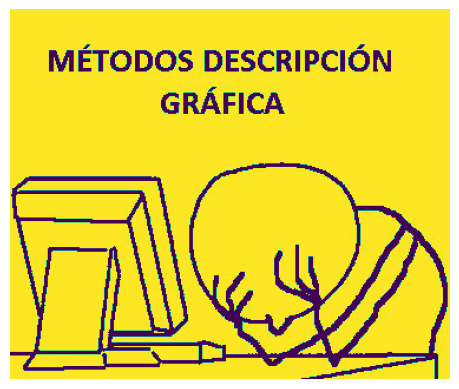

In [8]:
#Recupere la imagen original a partir de la fase y la amplitud de la transformada de fourier (archivos amplitude.dat y phase.dat).
#Recuerde que la transformada de fourier tiene una parte real y una imaginaria
#y recuerde tambien que un numero complejo se puede escribir a partir de la fase y la magnitud que son los datos que usted tiene
#(http://webpages.ursinus.edu/lriley/ref/complex/node1.html)


#1)Descargue los datos de fase y magnitud

magnitude = np.genfromtxt("magnitude.dat", delimiter=" ")
phase = np.genfromtxt("phase.dat", delimiter=" ")


#2) construya la transformada de fourier

Fourier = magnitude*(np.cos(phase) + 1j*np.sin(phase))

#3) Obtenga la imagen haciendo la transformada inversa

image = np.abs(ifft2(Fourier))
plt.imshow(image)
plt.axis('off')
